## Genre-based Movie Rating Analysis - Segmentatio
#### Farzaneh shirzadeh

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. Load the Movie & Rating Data set to pandas and format the data in a way that will allow you to compare the average ratings from users for each genre. Hint:  Split the Movie data based on genre. 


In [2]:
ratings= pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
M_R = pd.merge(movies, ratings, on = 'movieId')

split_genres = M_R['genres'].str.split('|', expand=True)
split_genres.columns = ['genre_{}'.format(i+1) for i in range(split_genres.shape[1])]
M_R = pd.concat([M_R, split_genres], axis=1)
M_R.head()

,movieId,title,genres,userId,rating,timestamp,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None


In [3]:
movies 

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [4]:
mean_ratings_by_genre = M_R.groupby(['userId','genres'])['rating'].mean()
Different_genres = pd.DataFrame(mean_ratings_by_genre).reset_index()
Different_genres.head(15)

,userId,genres,rating
0,1,Action|Adventure|Drama,2.000000
1,1,Action|Adventure|Fantasy,2.000000
2,1,Action|Adventure|Sci-Fi,4.000000
3,1,Action|Adventure|Sci-Fi|Thriller,2.000000
4,1,Action|Crime|Thriller,4.000000
5,1,Adventure|Animation|Children|Comedy|Fantasy,2.000000
6,1,Adventure|Animation|Comedy|Crime,1.000000
7,1,Adventure|Comedy,3.000000
8,1,Adventure|Comedy|Fantasy|Sci-Fi,1.000000
9,1,Adventure|Sci-Fi,2.500000


### 2. Using pandas, find two genres with significant review data to analyze, (not sci-fi or romance as they were in the demo). Use graphs or any other numerical summaries to figure out two genres with higher ratings. 

In [5]:
Different_genres = Different_genres.sort_values(by='rating', ascending=False)
Different_genres.head(10)

,userId,genres,rating
13056,197,Action|Adventure|Animation|Horror|Sci-Fi,5.0
8005,116,Action|Adventure|Drama|Fantasy,5.0
8033,117,Drama|Musical|Romance,5.0
20592,304,Mystery|Sci-Fi|Thriller,5.0
40017,584,Action|Crime|Drama,5.0
8022,116,Mystery|Thriller,5.0
8021,116,Drama|War,5.0
40018,584,Action|Crime|Drama|IMAX,5.0
8019,116,Drama|Horror|Mystery,5.0
8015,116,Comedy|Crime|Drama|Thriller,5.0


In [6]:
genres = ['Drama', 'Thriller']
filtered_genres = Different_genres.loc[Different_genres ['genres'].isin(genres)]

Analyze_genres = filtered_genres.pivot_table(index='userId', columns='genres', values='rating', fill_value=0)

Analyze_genres ['Thriller'] = Analyze_genres['Thriller'].replace(0,np.nan)
Analyze_genres ['Drama'] = Analyze_genres['Drama'].replace(0,np.nan)

Analyze_genres = Analyze_genres.groupby(['userId']).mean()
Analyze_genres = Analyze_genres.dropna(how = 'any')
Analyze_genres.head()

genres,Drama,Thriller
userId,,
1,2.833333,2.5
2,3.600000,3.0
5,4.000000,3.5
8,3.000000,4.5
10,4.666667,3.0


Text(0.5, 0, 'Drama Ratings')

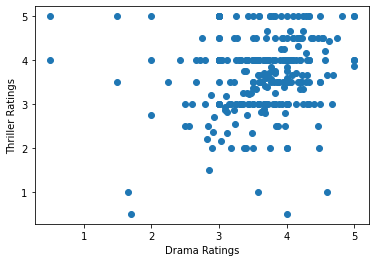

In [7]:
plt.scatter (Analyze_genres['Drama'], Analyze_genres['Thriller']) 
plt.ylabel('Thriller Ratings')
plt.xlabel('Drama Ratings')


### 3. Fit the data to a k-clustering model and experiment with 3 different K-Values to find segments where users have similar average ratings .  

C:\Users\shirz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


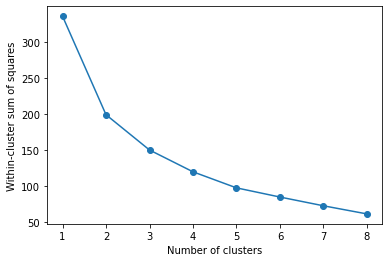

In [8]:
from sklearn.cluster import KMeans
X = np.array(Analyze_genres)
sse = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 9), sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [9]:

# Print the cluster labels
print(kmeans.labels_)

# Add the cluster labels to the data frame
Analyze_genres['cluster'] = kmeans.labels_

# Group the data by cluster and calculate the average ratings
grouped = Analyze_genres.groupby('cluster').mean()[['Drama','Thriller']]

# Print the grouped data
print(grouped)


[6 4 3 2 4 6 4 0 2 4 5 3 3 3 3 2 0 7 4 2 7 3 2 1 2 6 4 0 3 0 4 3 3 0 7 4 3
 1 6 3 4 4 5 4 0 0 3 4 3 0 4 0 0 7 4 3 4 3 3 0 4 3 3 0 7 6 5 6 0 2 0 6 2 0
 6 7 2 3 6 6 3 3 3 0 0 3 4 6 3 3 0 4 3 3 4 5 4 4 6 3 2 0 4 4 4 4 3 6 7 3 4
 3 4 7 1 7 2 4 6 0 0 7 3 0 7 0 7 2 3 3 3 5 7 3 0 3 3 4 4 7 6 2 3 6 1 4 6 4
 3 4 4 3 3 7 3 3 1 3 4 6 1 2 0 3 7 3 3 4 2 2 6 0 0 4 3 6 1 6 6 0 1 7 3 6 0
 1 0 6 3 0 4 0 7 7 2 3 7 4 7 7 4 5 6 0 6 4 6 3 0 4 3 2 4 6 3 3 1 7 0 6 1 7
 4 1 4 4 7 4 6 2 2 0 3 0 0 4 7 0 7 4 2 0 6 4 4 7 0 4 7 3 0 7 1 7 4 3 2 2 3
 3 6 4 3 6 0 3 1 0 1 0 1 6 4 0 7 0 0 3 1 3 7 3 3 0 7 0 3 4 3 4 6 4 4 0]
genres      Drama  Thriller
cluster                    
0        3.353657  3.907843
1        3.382540  1.647059
2        3.286642  4.811594
3        4.140771  3.845014
4        3.826353  3.083415
5        1.333333  4.416667
6        2.975501  2.886505
7        4.268951  4.708683


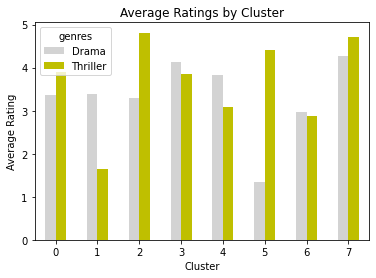

In [10]:
# Plot a bar chart of the average ratings for each cluster
grouped.plot(kind='bar', color=['lightgray', 'y'])
plt.xticks(rotation=0)
plt.xlabel('Cluster')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Cluster')
plt.show()

Text(0, 0.5, 'Thriller Ratings')

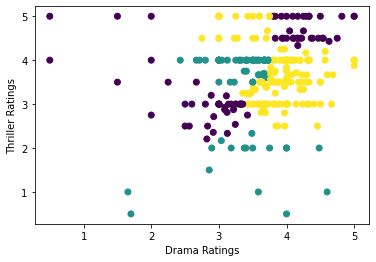

In [11]:
from sklearn.cluster import KMeans
KMeans = KMeans(n_clusters = 3, random_state = 0)
fit = KMeans.fit(Analyze_genres)
y_KMeans =KMeans.predict(Analyze_genres)

plt.scatter (Analyze_genres['Drama'], Analyze_genres['Thriller'], c=y_KMeans) 
plt.xlabel('Drama Ratings')
plt.ylabel('Thriller Ratings')

### 4. Do the same as in part 3 by selecting 4 genres with significant review(rating) data.  

In [12]:
# Select four genres with significant review data
genres = ['Drama', 'Thriller', 'Comedy', 'Action']
filtered_genres = Different_genres.loc[Different_genres ['genres'].isin(genres)]

Analyze_genres = filtered_genres.pivot_table(index='userId', columns='genres', values='rating', fill_value=0)

Analyze_genres ['Action'] = Analyze_genres['Action'].replace(0,np.nan)
Analyze_genres ['Drama'] = Analyze_genres['Drama'].replace(0,np.nan)
Analyze_genres ['Thriller'] = Analyze_genres['Thriller'].replace(0,np.nan)
Analyze_genres ['Comedy'] = Analyze_genres['Comedy'].replace(0,np.nan)

Analyze_genres = Analyze_genres.groupby(['userId']).mean()
Analyze_genres = Analyze_genres.dropna(how = 'any')
Analyze_genres.head()

genres,Action,Comedy,Drama,Thriller
userId,,,,
19,3.000000,3.521739,3.702128,3.60
32,4.000000,3.333333,3.600000,5.00
58,2.000000,3.428571,3.400000,4.00
70,4.000000,3.727273,4.333333,5.00
73,3.142857,2.836000,3.778409,3.75


C:\Users\shirz\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


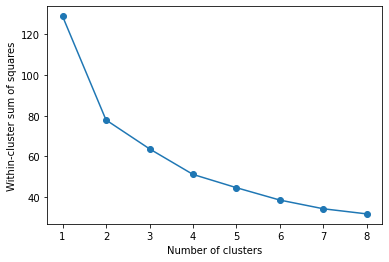

In [13]:
from sklearn.cluster import KMeans
X = np.array(Analyze_genres)
sse = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 9), sse, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

genres      Drama  Thriller    Comedy    Action
cluster                                        
0        3.139206  2.945867  2.785120  1.955833
1        3.818545  4.465686  3.726831  3.517647
2        3.523369  3.445635  3.109126  3.467120


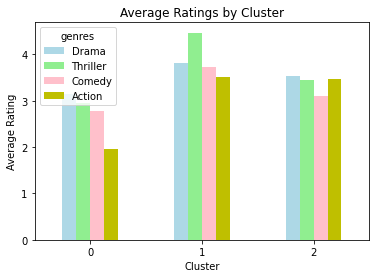

In [14]:

data =  Analyze_genres[genres]

# Fit the data to a k-means clustering model with 4 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)

# Add the cluster labels to the original data frame
Analyze_genres['cluster'] = kmeans.labels_

# Group the data by cluster and calculate the average ratings
grouped = Analyze_genres.groupby('cluster').mean()[genres]
print(grouped)
# Define the colors for each genre
colors = ['lightblue', 'lightgreen', 'pink', 'y']

# Plot a bar chart of the average ratings for each cluster with different colors for each genre
grouped.plot(kind='bar', color=colors)
plt.xticks(rotation=0)
plt.xlabel('Cluster')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Cluster')
plt.show()


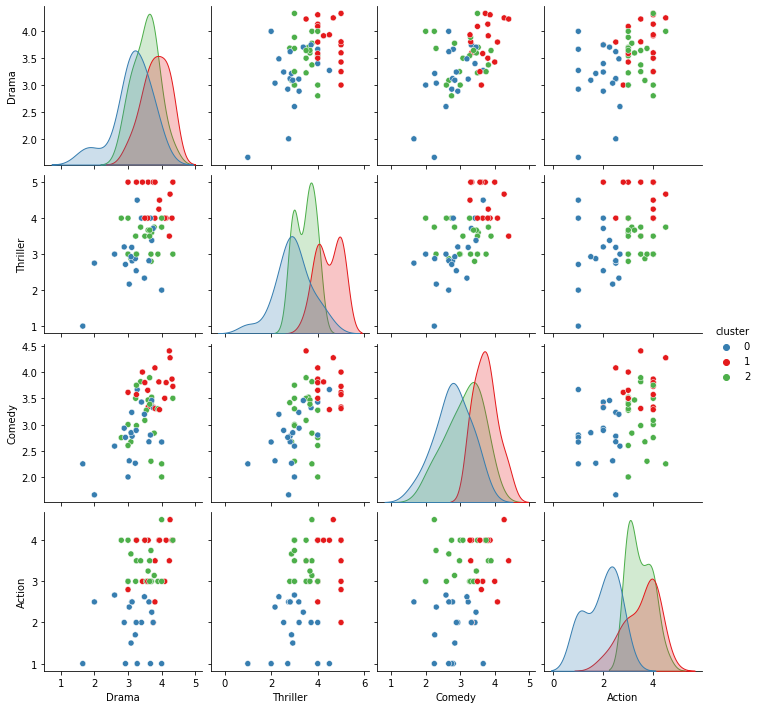

In [15]:
import seaborn as sns

custom_cmap = sns.color_palette(['#377eb0', '#e41a1c', '#4daf4a'])

# Create a pair plot with the cluster labels as hue
sns.pairplot(Analyze_genres, vars=genres, hue='cluster', palette=custom_cmap)
plt.show()

### explanation: 


The data has been clustered into three different clusters (labeled as 0, 1, and 2).
The average ratings for Drama and Thriller genres are highest in cluster 1, while the average ratings for Drama and Action genres are highest in cluster 2. Overall, cluster 1 has the highest average ratings across all genres, while cluster 0 has the lowest average ratings.
The clustering indicates that there are significant differences in how users rate different genres of movies, with some users consistently rating certain genres higher or lower than others.
These results can be used to gain insights into user preferences for different movie genres and to inform marketing or content development strategies for movie streaming services.

### 5. Based on just the rating data, should a standard scaler be used to pre-process the data? 


In [16]:
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


As the question only provides rating data without any additional features, it is not clear whether standard scaling would be beneficial or not. Standard scaling is typically used to normalize the data and adjust for differences in scale among features(like diffrent ganres). However, in this question, there are no additional features to normalize. Therefore, it may not be necessary to use standard scaling for pre-processing the rating data. It would be important to consider the specific analysis being performed and the algorithm being used to determine if standard scaling is necessary or beneficial for the analysis.

### 6. Consider how the clustering exercise would be different with no genre data, could the data formatting we did with genres be done with movie titles? Justify your answer. 


Without genre data, clustering movies based on similarities would be challenging. 
While data formatting with movie titles is possible, it may not provide useful insights since titles can be subjective and not representative of the movie's content. Additionally, titles may not capture the subtleties of a movie that genres can. Therefore, clustering based on titles may not be an effective approach.

### 7. Can a k-clustering model predict how much someone will enjoy a movie with the given data? 

No, using the available data, a k-clustering model cannot forecast how much a viewer would enjoy a particular film. An unsupervised learning technique called K-clustering locates groups or clusters within a dataset based on data similarities. It is intended to uncover patterns and relationships within the data rather than to make predictions on fresh or previously unobserved data.

A supervised learning technique like regression or classification would be more appropriate to estimate how much someone will love a movie. These methods need labelled data with a known target variable (in this case, the enjoyment rating), and the model is trained to predict the target variable based on the input data (such as movie features, demographic data, etc.).